# LSTM 

## Outline
1. [Imports](#imports)
2. [Data](#data)
3. [Model](#model)
5. [Train](#train)
6. [Predict](#predict)

<a name=imports></a>
## Imports

In [1]:
import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

<a name=data></a>
## Data

### Ingestion 

In [2]:
# Get the path of the current working directory
curPath = os.getcwd()
# Appened the parent directory to the current path to step out of the current folder
parentDir = os.path.abspath(os.path.join(curPath, os.pardir))
print("Parent Directory", parentDir)
# Save the path to all of the datasets
india_cases_path = os.path.join(parentDir, "../cleaned_datasets/india/daily_cases_india.csv")
india_vacc_path = os.path.join(parentDir, "../cleaned_datasets/india/daily_vacc_india.csv")
usa_cases_path = os.path.join(parentDir, "../cleaned_datasets/usa/daily_cases_usa.csv")
usa_vacc_path = os.path.join(parentDir, "../cleaned_datasets/usa/vacc_usa.csv")

# Quick check to make sure the path exists
print("Path:", india_cases_path)
print("Exists:", os.path.exists(india_cases_path))

Parent Directory /covid19-prediction/models
Path: /covid19-prediction/models/../cleaned_datasets/india/daily_cases_india.csv
Exists: True


In [3]:
# Load the data as a pandas dataframe
india_cases_df = pd.read_csv(india_cases_path)
india_vacc_df =  pd.read_csv(india_vacc_path)

usa_cases_df = pd.read_csv(usa_cases_path)
usa_vacc_df = pd.read_csv(usa_vacc_path)

# Visualize the datasets
print('India Cases:\n',india_cases_df.head(),'\n')
print('India Vacc:\n',india_vacc_df.head(),'\n')

print('USA Cases:\n',usa_cases_df.head(),'\n')
print('USA Vacc:\n',usa_vacc_df.head(),'\n')

India Cases:
    Unnamed: 0        Date  Confirmed  Deaths  Recovered  Active
0           0  2020-01-30        1.0     0.0        0.0     0.0
1           1  2020-01-31        0.0     0.0        0.0     0.0
2           2  2020-02-01        0.0     0.0        0.0     0.0
3           3  2020-02-02        1.0     0.0        0.0     0.0
4           4  2020-02-03        1.0     0.0        0.0     0.0 

India Vacc:
    Updated On  Total_Doses  First_Dose  Second_Dose
0  2021-01-16          NaN         NaN          NaN
1  2021-01-17      20656.0     20656.0          0.0
2  2021-01-18      81690.0     81690.0          0.0
3  2021-01-19     192152.0    192152.0          0.0
4  2021-01-20     111510.0    111510.0          0.0 

USA Cases:
          Date  Confirmed  Deaths  Recovered
0  2020-04-14    26713.0  2305.0     6484.0
1  2020-04-15    29380.0  2478.0     6093.0
2  2020-04-16    31542.0  4616.0     5234.0
3  2020-04-17    32022.0  3879.0     5904.0
4  2020-04-18    32502.0  1859.0    13591

### Pre-Processing

### Multivariate

In [4]:
india_cases_multi_df = india_cases_df[["Date","Confirmed","Deaths","Recovered","Active"]]

### Univariate 

In [5]:
# Select only the Confirmed column for univariate analysis
# Selecting from the first index because the 0th index is NaN
india_cases_df = india_cases_df[["Confirmed"]][1:]
usa_cases_df = usa_cases_df[["Confirmed"]][1:]

# Visualize the datasets
print('India Cases:\n',india_cases_df.head(),'\n')
print('USA Cases:\n',usa_cases_df.head(),'\n')

India Cases:
    Confirmed
1        0.0
2        0.0
3        1.0
4        1.0
5        0.0 

USA Cases:
    Confirmed
1    29380.0
2    31542.0
3    32022.0
4    32502.0
5    26588.0 



In [6]:
# Normalize the data
india_cases_mean = india_cases_df.mean()
india_cases_std = india_cases_df.std()

usa_cases_mean = usa_cases_df.mean()
usa_cases_std = usa_cases_df.std()


india_cases_normalized_df = (india_cases_df-india_cases_mean)/india_cases_std
usa_cases_normalized_df = (usa_cases_df-usa_cases_mean)/usa_cases_std

# Visualize the datasets
print('India Cases:\n',india_cases_normalized_df.head(),'\n')
print('USA Cases:\n',usa_cases_normalized_df.head(),'\n')

India Cases:
    Confirmed
1  -0.687995
2  -0.687995
3  -0.687983
4  -0.687983
5  -0.687995 

USA Cases:
    Confirmed
1  -0.759976
2  -0.727837
3  -0.720702
4  -0.713566
5  -0.801480 



In [7]:
# Create train test splits
india_cases_train, india_cases_test = train_test_split(india_cases_normalized_df, test_size=0.2, shuffle=False)
india_vacc_train, india_vacc_test = train_test_split(india_vacc_df, test_size=0.2, shuffle=False)

usa_cases_train, usa_cases_test = train_test_split(usa_cases_normalized_df, test_size=0.2, shuffle=False)
usa_vacc_train, usa_vacc_test = train_test_split(usa_vacc_df, test_size=0.2, shuffle=False)

# Visualize splits
print('India Cases:\n',india_cases_train,'\n')
print('USA Cases:\n',usa_cases_train,'\n')

India Cases:
      Confirmed
1    -0.687995
2    -0.687995
3    -0.687983
4    -0.687983
5    -0.687995
..         ...
492   0.750239
493   0.576535
494   0.398886
495   0.475509
496   0.486403

[496 rows x 1 columns] 

USA Cases:
      Confirmed
1    -0.759976
2    -0.727837
3    -0.720702
4    -0.713566
5    -0.801480
..         ...
432  -1.130479
433  -1.022988
434  -1.037824
435  -1.003589
436  -0.992157

[436 rows x 1 columns] 



In [8]:
# Convert to numpy array
india_cases_train, india_cases_test = india_cases_train.to_numpy().flatten(), india_cases_test.to_numpy()
usa_cases_train, usa_cases_test = usa_cases_train.to_numpy().flatten(), usa_cases_test.to_numpy()

# Visualize outputs
print('India Cases:\n',india_cases_train,'\n')
print('USA Cases:\n',usa_cases_train,'\n')

India Cases:
 [-6.87995117e-01 -6.87995117e-01 -6.87982552e-01 -6.87982552e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87969986e-01
 -6.87995117e-01 -6.87706113e-01 -6.87969986e-01 -6.87982552e-01
 -6.87957421e-01 -6.87932290e-01 -6.87944855e-01 -6.87831767e-01
 -6.87919725e-01 -6.87856898e-01 -6.87882028e-01 -6.87743809e-01
 -6.87856898e-01 -6.87919725e-01 -6.87706113e-01 -6.87819202e-01
 -6.87517632e-01 -6.87366848e-01 -6.86914494e-01 -6.87165802e-01
 -6.86700882e-01 -6.87530198e-01 -6.86474705e-01 -6.87115540e-01
 -6.85984655e-01 -6.86738578e-01 -6.87530198e-01 -6.85142775e-01
 -6.8616057

In [9]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [10]:
# choose a number of time steps
n_steps = 3
# split into samples
india_cases_train_X, india_cases_train_y = split_sequence(india_cases_train, n_steps)
india_cases_test_X, india_cases_test_y = split_sequence(india_cases_test, n_steps)
usa_cases_train_X, usa_cases_train_y = split_sequence(usa_cases_train, n_steps)
usa_cases_test_X, usa_cases_test_y = split_sequence(usa_cases_test, n_steps)

# summarize the data
for i in range(0,5):
    print(india_cases_train_X[i], india_cases_train_y[i])
print()
# summarize the data
for i in range(0,5):
    print(usa_cases_train_X[i], usa_cases_train_y[i])

[-0.68799512 -0.68799512 -0.68798255] -0.687982551549953
[-0.68799512 -0.68798255 -0.68798255] -0.6879951169346211
[-0.68798255 -0.68798255 -0.68799512] -0.6879951169346211
[-0.68798255 -0.68799512 -0.68799512] -0.6879951169346211
[-0.68799512 -0.68799512 -0.68799512] -0.6879951169346211

[-0.75997589 -0.72783707 -0.72070172] -0.7135663621434901
[-0.72783707 -0.72070172 -0.71356636] -0.8014798602697645
[-0.72070172 -0.71356636 -0.80147986] -0.8206709874393655
[-0.71356636 -0.80147986 -0.82067099] -0.7796129756326746
[-0.80147986 -0.82067099 -0.77961298] -0.7701734979001443


In [11]:
# Reshape the data into [samples, timesteps, features]
# univariate
n_features = 1

india_cases_train_X = india_cases_train_X.reshape((india_cases_train_X.shape[0], 
                                                   india_cases_train_X.shape[1], n_features))
india_cases_test_X = india_cases_test_X.reshape((india_cases_test_X.shape[0], 
                                                 india_cases_test_X.shape[1], n_features))

usa_cases_train_X = usa_cases_train_X.reshape((usa_cases_train_X.shape[0], 
                                                   usa_cases_train_X.shape[1], n_features))
usa_cases_test_X = usa_cases_test_X.reshape((usa_cases_test_X.shape[0], 
                                                   usa_cases_test_X.shape[1], n_features))

# Visualize outputs
print('India Cases:\n',india_cases_train_X,'\n')
print('USA Cases:\n',usa_cases_train_X,'\n')

India Cases:
 [[[-0.68799512]
  [-0.68799512]
  [-0.68798255]]

 [[-0.68799512]
  [-0.68798255]
  [-0.68798255]]

 [[-0.68798255]
  [-0.68798255]
  [-0.68799512]]

 ...

 [[ 0.82649813]
  [ 0.75023881]
  [ 0.57653493]]

 [[ 0.75023881]
  [ 0.57653493]
  [ 0.39888553]]

 [[ 0.57653493]
  [ 0.39888553]
  [ 0.47550924]]] 

USA Cases:
 [[[-0.75997589]
  [-0.72783707]
  [-0.72070172]]

 [[-0.72783707]
  [-0.72070172]
  [-0.71356636]]

 [[-0.72070172]
  [-0.71356636]
  [-0.80147986]]

 ...

 [[-1.07058673]
  [-1.13047911]
  [-1.02298798]]

 [[-1.13047911]
  [-1.02298798]
  [-1.03782357]]

 [[-1.02298798]
  [-1.03782357]
  [-1.00358874]]] 



<a name=model></a>
## Model 

In [12]:
# Imports for model components
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import MeanAbsolutePercentageError, MeanAbsoluteError
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### Univariate non-stacked -- Rolling

In [13]:
# Define the model
def build_univariate_non_stacked(optimizer="adam", lstm_nparams=100, n_steps=3, n_features=1):
    model_uni = Sequential()
    model_uni.add(LSTM(lstm_nparams, activation='relu', input_shape=(n_steps, n_features)))
    model_uni.add(Dense(1))
    model_uni.compile(optimizer=optimizer,loss='mae', metrics=["mae"])
    model_uni.summary()
    return model_uni

### Univariate non-stacked -- Long-Term

In [14]:
# Define the model
def build_univariate_non_stacked_long(optimizer="adam", lstm_nparams=100, n_steps=3, n_features=1):
    model_uni = Sequential()
    model_uni.add(LSTM(lstm_nparams, activation='relu', input_shape=(n_steps, n_features)))
    model_uni.add(Dense(10))
    model_uni.compile(optimizer=optimizer,loss='mae', metrics=["mae"])
    model_uni.summary()
    return model_uni

#### Grid Search

In [15]:
# Using KerasClassifier wrapper 
keras_estimator = KerasRegressor(build_fn=build_univariate_non_stacked, verbose=1)

In [16]:
# Defining parameters for the gridserach
param_grid = {
#     'epochs': [10,100,300,],
    'lstm_nparams':[15,50],
#     'n_steps': [3, 6, 15],
#     'optimizer': ['RMSprop','Adam','Adamax','sgd']
}

kfold_splits = 5

In [ ]:
# Defining GridSearch
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=-1,
                    return_train_score=True,
                    cv=kfold_splits,
                    param_grid=param_grid,
#                     scoring="neg_mean_absolute_error",
)

In [ ]:
# Fitting GridSearch
grid_result = grid.fit(india_cases_train_X, india_cases_train_y, )

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Writing the gridsearch results to file
file1 = open("univariate_non_stacked_india.txt", "w")
file1.write("mean,stdev,pram")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    file1.write("%f,%f,%r" % (mean, stdev, param))
    file1.write("\n")
file1.close()

In [ ]:
sorted(grid_result.cv_results_.keys())

In [ ]:
grid_result.cv_results_['split2_train_score']

### Univariate stacked -- Rolling

In [17]:
# Define the model
def build_univariate_stacked(optimizer="adam",lstm_nparams_l1=100, lstm_nparams_l2=150, n_steps=3, n_features=1):
    model_uni_stacked = Sequential()
    model_uni_stacked.add(LSTM(lstm_nparams_l1, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model_uni_stacked.add(LSTM(lstm_nparams_l2, activation='relu'))
    model_uni_stacked.add(Dense(1))
    model_uni_stacked.compile(optimizer=optimizer,loss='mae')
    model_uni_stacked.summary()
    return model_uni_stacked

### Univariate stacked -- Long-Term

In [18]:
# Define the model
def build_univariate_stacked_long(optimizer="adam",lstm_nparams_l1=100, lstm_nparams_l2=150, n_steps=3, n_features=1):
    model_uni_stacked = Sequential()
    model_uni_stacked.add(LSTM(lstm_nparams_l1, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model_uni_stacked.add(LSTM(lstm_nparams_l2, activation='relu'))
    model_uni_stacked.add(Dense(10))
    model_uni_stacked.compile(optimizer=optimizer,loss='mae')
    model_uni_stacked.summary()
    return model_uni_stacked

#### Grid Search

In [ ]:
# Using KerasClassifier wrapper 
keras_estimator = KerasRegressor(build_fn=build_univariate_stacked, verbose=1)

In [ ]:
# Defining parameters for the gridserach
param_grid = {
    'epochs': [10,100,300,],
    'lstm_nparams_l1':[15,50,100,150],
    'lstm_nparams_l2':[15,50,100,150],
    'n_steps': [3, 6, 15],
#     'optimizer': ['RMSprop','Adam','Adamax','sgd']
}

kfold_splits = 5

In [ ]:
# Defining GridSearch
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=-1,
                    return_train_score=True,
                    cv=kfold_splits,
                    param_grid=param_grid,
                    scoring="neg_mean_absolute_error",
)

In [ ]:
# Fitting GridSearch
grid_result = grid.fit(india_cases_train_X, india_cases_train_y, )

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Writing the gridsearch results to file
file1 = open("univariate_stacked_india.txt", "w")
file1.write("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
file1.write("\n")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    file1.write("%f (%f) with: %r" % (mean, stdev, param))
    file1.write("\n")
file1.close()

## Multivariate 

In [19]:
# Define the model
model_uni = Sequential()
model_uni.add(LSTM(150, activation='relu', input_shape=(n_steps, n_features)))
model_uni.add(Dense(1))
model_uni.compile(optimizer='adam',loss='mae')
model_uni.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


<a name=train></a>
## Train 

In [20]:
# Tensorboard callback
logdir = os.path.join(parentDir+"/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [33]:
def train_models(model,train_X,train_y,test_X,test_y):
    model.fit(train_X,train_y,
              validation_data=(test_X,test_y),
              epochs=300,
              callbacks=[tensorboard_callback])
    return model
#     model.save(save_name)

In [34]:
# Define all of the LSTM models
model_uni_non_stacked_india = build_univariate_non_stacked()
model_uni_non_stacked_usa = build_univariate_non_stacked()
model_uni_non_stacked_long_india = build_univariate_non_stacked_long()
model_uni_non_stacked_long_usa = build_univariate_non_stacked_long()
model_uni_stacked_india = build_univariate_stacked()
model_uni_stacked_usa = build_univariate_stacked()
model_uni_stacked_long_india = build_univariate_stacked_long()
model_uni_stacked_long_usa = build_univariate_stacked()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_27"

In [35]:
models_india = [model_uni_non_stacked_india,model_uni_non_stacked_long_india,model_uni_stacked_india ,model_uni_stacked_long_india]
models_usa = [model_uni_non_stacked_usa,model_uni_non_stacked_long_usa,model_uni_stacked_usa ,model_uni_stacked_long_usa]

In [36]:
models_india_trained = []
for m in models_india:
    models_india_trained.append(train_models(m,india_cases_train_X,india_cases_train_y,india_cases_test_X,india_cases_test_y))

Epoch 1/300
16/16 [==============================] - 1s 28ms/step - loss: 0.6467 - mae: 0.6467 - val_loss: 0.1707 - val_mae: 0.1707
Epoch 2/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5075 - mae: 0.5075 - val_loss: 0.1063 - val_mae: 0.1063
Epoch 3/300
16/16 [==============================] - 0s 6ms/step - loss: 0.2867 - mae: 0.2867 - val_loss: 0.0698 - val_mae: 0.0698
Epoch 4/300
16/16 [==============================] - 0s 6ms/step - loss: 0.1213 - mae: 0.1213 - val_loss: 0.0781 - val_mae: 0.0781
Epoch 5/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0972 - mae: 0.0972 - val_loss: 0.0833 - val_mae: 0.0833
Epoch 6/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0925 - mae: 0.0925 - val_loss: 0.0715 - val_mae: 0.0715
Epoch 7/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0939 - mae: 0.0939 - val_loss: 0.0718 - val_mae: 0.0718
Epoch 8/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0911 - 

16/16 [==============================] - 0s 6ms/step - loss: 0.0692 - mae: 0.0692 - val_loss: 0.0659 - val_mae: 0.0659
Epoch 64/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0695 - mae: 0.0695 - val_loss: 0.0726 - val_mae: 0.0726
Epoch 65/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0692 - mae: 0.0692 - val_loss: 0.0645 - val_mae: 0.0645
Epoch 66/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0684 - mae: 0.0684 - val_loss: 0.0660 - val_mae: 0.0660
Epoch 67/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0682 - mae: 0.0682 - val_loss: 0.0663 - val_mae: 0.0663
Epoch 68/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0673 - mae: 0.0673 - val_loss: 0.0663 - val_mae: 0.0663
Epoch 69/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0674 - mae: 0.0674 - val_loss: 0.0684 - val_mae: 0.0684
Epoch 70/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0672 - mae: 0

Epoch 125/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0690 - mae: 0.0690 - val_loss: 0.0674 - val_mae: 0.0674
Epoch 126/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0697 - mae: 0.0697 - val_loss: 0.0686 - val_mae: 0.0686
Epoch 127/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0672 - mae: 0.0672 - val_loss: 0.0647 - val_mae: 0.0647
Epoch 128/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0650 - mae: 0.0650 - val_loss: 0.0683 - val_mae: 0.0683
Epoch 129/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0659 - mae: 0.0659 - val_loss: 0.0652 - val_mae: 0.0652
Epoch 130/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0673 - mae: 0.0673 - val_loss: 0.0674 - val_mae: 0.0674
Epoch 131/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0669 - mae: 0.0669 - val_loss: 0.0635 - val_mae: 0.0635
Epoch 132/300
16/16 [==============================] - 0s 6ms/step - 

16/16 [==============================] - 0s 5ms/step - loss: 0.0642 - mae: 0.0642 - val_loss: 0.0612 - val_mae: 0.0612
Epoch 187/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0649 - mae: 0.0649 - val_loss: 0.0652 - val_mae: 0.0652
Epoch 188/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0620 - mae: 0.0620 - val_loss: 0.0624 - val_mae: 0.0624
Epoch 189/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0638 - val_mae: 0.0638
Epoch 190/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0632 - val_mae: 0.0632
Epoch 191/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0622 - mae: 0.0622 - val_loss: 0.0629 - val_mae: 0.0629
Epoch 192/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0644 - mae: 0.0644 - val_loss: 0.0632 - val_mae: 0.0632
Epoch 193/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0622 -

KeyboardInterrupt: 

In [ ]:
for m in models_usa:
    train_models(m,usa_cases_train_X,usa_cases_train_y,usa_cases_test_X,usa_cases_test_y)

### Univariate non-stacked -- Rolling

In [37]:
# Fit the model
model_uni_non_stacked_india = build_univariate_non_stacked()
model_uni_non_stacked_india.fit(india_cases_train_X,
          india_cases_train_y, 
          validation_data=(india_cases_test_X, india_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_non_stacked_india.save('univar_non_stack_rolling_india.h5')

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 1s 28ms/step - loss: 0.6634 - mae: 0.6634 - val_loss: 0.1626 - val_mae: 0.1626
Epoch 2/300
16/16 [==============================] - 0s 6ms/step - loss: 0.5375 - mae: 0.5375 - val_loss: 0.0882 - val_mae: 0.0882
Epoch 3/300
16/16 [==============================] - 0s 6ms/step - loss: 0.3637 - mae: 0.3637 - val_loss: 0.0806 - val_mae: 0.0806
Epoch 4/300
16/16 [==============================] - 0s 5ms/step - loss: 0.1857 - mae: 0.1857 - val_loss: 0.0863 - va

16/16 [==============================] - 0s 6ms/step - loss: 0.0706 - mae: 0.0706 - val_loss: 0.0671 - val_mae: 0.0671
Epoch 58/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0712 - mae: 0.0712 - val_loss: 0.0652 - val_mae: 0.0652
Epoch 59/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0707 - mae: 0.0707 - val_loss: 0.0683 - val_mae: 0.0683
Epoch 60/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0701 - mae: 0.0701 - val_loss: 0.0634 - val_mae: 0.0634
Epoch 61/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0735 - mae: 0.0735 - val_loss: 0.0685 - val_mae: 0.0685
Epoch 62/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0742 - mae: 0.0742 - val_loss: 0.0713 - val_mae: 0.0713
Epoch 63/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0691 - mae: 0.0691 - val_loss: 0.0696 - val_mae: 0.0696
Epoch 64/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0704 - mae: 0

16/16 [==============================] - 0s 6ms/step - loss: 0.0657 - mae: 0.0657 - val_loss: 0.0643 - val_mae: 0.0643
Epoch 120/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0688 - mae: 0.0688 - val_loss: 0.0678 - val_mae: 0.0678
Epoch 121/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0669 - mae: 0.0669 - val_loss: 0.0638 - val_mae: 0.0638
Epoch 122/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0673 - mae: 0.0673 - val_loss: 0.0645 - val_mae: 0.0645
Epoch 123/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0665 - mae: 0.0665 - val_loss: 0.0699 - val_mae: 0.0699
Epoch 124/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0712 - mae: 0.0712 - val_loss: 0.0676 - val_mae: 0.0676
Epoch 125/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0681 - mae: 0.0681 - val_loss: 0.0681 - val_mae: 0.0681
Epoch 126/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0678 -

Epoch 181/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0637 - mae: 0.0637 - val_loss: 0.0640 - val_mae: 0.0640
Epoch 182/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0637 - mae: 0.0637 - val_loss: 0.0669 - val_mae: 0.0669
Epoch 183/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0629 - mae: 0.0629 - val_loss: 0.0673 - val_mae: 0.0673
Epoch 184/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0658 - mae: 0.0658 - val_loss: 0.0647 - val_mae: 0.0647
Epoch 185/300
16/16 [==============================] - 0s 7ms/step - loss: 0.0636 - mae: 0.0636 - val_loss: 0.0627 - val_mae: 0.0627
Epoch 186/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0662 - val_mae: 0.0662
Epoch 187/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0624 - mae: 0.0624 - val_loss: 0.0644 - val_mae: 0.0644
Epoch 188/300
16/16 [==============================] - 0s 6ms/step - 

16/16 [==============================] - 0s 5ms/step - loss: 0.0648 - mae: 0.0648 - val_loss: 0.0668 - val_mae: 0.0668
Epoch 243/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0662 - mae: 0.0662 - val_loss: 0.0591 - val_mae: 0.0591
Epoch 244/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0612 - mae: 0.0612 - val_loss: 0.0663 - val_mae: 0.0663
Epoch 245/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0596 - mae: 0.0596 - val_loss: 0.0645 - val_mae: 0.0645
Epoch 246/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0614 - mae: 0.0614 - val_loss: 0.0581 - val_mae: 0.0581
Epoch 247/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0614 - mae: 0.0614 - val_loss: 0.0591 - val_mae: 0.0591
Epoch 248/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0584 - mae: 0.0584 - val_loss: 0.0610 - val_mae: 0.0610
Epoch 249/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0587 -

In [38]:
# Fit the model
model_uni_non_stacked_usa = build_univariate_non_stacked()
model_uni_non_stacked_usa.fit(usa_cases_train_X,
          usa_cases_train_y, 
          validation_data=(usa_cases_test_X, usa_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_non_stacked_usa.save('univar_non_stack_rolling_usa.h5')

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
14/14 [==============================] - 1s 33ms/step - loss: 0.7232 - mae: 0.7232 - val_loss: 0.9250 - val_mae: 0.9250
Epoch 2/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5765 - mae: 0.5765 - val_loss: 0.8776 - val_mae: 0.8776
Epoch 3/300
14/14 [==============================] - 0s 6ms/step - loss: 0.4133 - mae: 0.4133 - val_loss: 0.8213 - val_mae: 0.8213
Epoch 4/300
14/14 [==============================] - 0s 6ms/step - loss: 0.2663 - mae: 0.2663 - val_loss: 0.7916 - va

14/14 [==============================] - 0s 6ms/step - loss: 0.1554 - mae: 0.1554 - val_loss: 0.7859 - val_mae: 0.7859
Epoch 58/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1565 - mae: 0.1565 - val_loss: 0.7844 - val_mae: 0.7844
Epoch 59/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1567 - mae: 0.1567 - val_loss: 0.7800 - val_mae: 0.7800
Epoch 60/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1554 - mae: 0.1554 - val_loss: 0.7846 - val_mae: 0.7846
Epoch 61/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1566 - mae: 0.1566 - val_loss: 0.7826 - val_mae: 0.7826
Epoch 62/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1557 - mae: 0.1557 - val_loss: 0.7832 - val_mae: 0.7832
Epoch 63/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1601 - mae: 0.1601 - val_loss: 0.7765 - val_mae: 0.7765
Epoch 64/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1553 - mae: 0

14/14 [==============================] - 0s 6ms/step - loss: 0.1494 - mae: 0.1494 - val_loss: 0.7784 - val_mae: 0.7784
Epoch 120/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1493 - mae: 0.1493 - val_loss: 0.7908 - val_mae: 0.7908
Epoch 121/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1469 - mae: 0.1469 - val_loss: 0.7792 - val_mae: 0.7792
Epoch 122/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1456 - mae: 0.1456 - val_loss: 0.7876 - val_mae: 0.7876
Epoch 123/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1464 - mae: 0.1464 - val_loss: 0.7812 - val_mae: 0.7812
Epoch 124/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1446 - mae: 0.1446 - val_loss: 0.7839 - val_mae: 0.7839
Epoch 125/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1439 - mae: 0.1439 - val_loss: 0.7754 - val_mae: 0.7754
Epoch 126/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1455 -

Epoch 181/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1401 - mae: 0.1401 - val_loss: 0.7819 - val_mae: 0.7819
Epoch 182/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1402 - mae: 0.1402 - val_loss: 0.7846 - val_mae: 0.7846
Epoch 183/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1404 - mae: 0.1404 - val_loss: 0.7849 - val_mae: 0.7849
Epoch 184/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1405 - mae: 0.1405 - val_loss: 0.7832 - val_mae: 0.7832
Epoch 185/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1450 - mae: 0.1450 - val_loss: 0.7885 - val_mae: 0.7885
Epoch 186/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1407 - mae: 0.1407 - val_loss: 0.7784 - val_mae: 0.7784
Epoch 187/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1382 - mae: 0.1382 - val_loss: 0.7792 - val_mae: 0.7792
Epoch 188/300
14/14 [==============================] - 0s 6ms/step - 

14/14 [==============================] - 0s 5ms/step - loss: 0.1362 - mae: 0.1362 - val_loss: 0.7734 - val_mae: 0.7734
Epoch 243/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1340 - mae: 0.1340 - val_loss: 0.7592 - val_mae: 0.7592
Epoch 244/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1361 - mae: 0.1361 - val_loss: 0.7627 - val_mae: 0.7627
Epoch 245/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1381 - mae: 0.1381 - val_loss: 0.7664 - val_mae: 0.7664
Epoch 246/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1361 - mae: 0.1361 - val_loss: 0.7578 - val_mae: 0.7578
Epoch 247/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1344 - mae: 0.1344 - val_loss: 0.7671 - val_mae: 0.7671
Epoch 248/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1329 - mae: 0.1329 - val_loss: 0.7726 - val_mae: 0.7726
Epoch 249/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1337 -

### Univariate non-stacked -- Long-Term

In [39]:
# Fit the model
model_uni_non_stacked_long_india = build_univariate_non_stacked_long()
model_uni_non_stacked_long_india.fit(india_cases_train_X,
          india_cases_train_y, 
          validation_data=(india_cases_test_X, india_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_non_stacked_long_india.save('univar_non_stacked_long_term_india.h5')

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1010      
Total params: 41,810
Trainable params: 41,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 1s 27ms/step - loss: 0.6800 - mae: 0.6800 - val_loss: 0.1929 - val_mae: 0.1929
Epoch 2/300
16/16 [==============================] - 0s 5ms/step - loss: 0.6094 - mae: 0.6094 - val_loss: 0.1340 - val_mae: 0.1340
Epoch 3/300
16/16 [==============================] - 0s 6ms/step - loss: 0.4707 - mae: 0.4707 - val_loss: 0.0782 - val_mae: 0.0782
Epoch 4/300
16/16 [==============================] - 0s 5ms/step - loss: 0.2184 - mae: 0.2184 - val_loss: 0.1033 - va

16/16 [==============================] - 0s 5ms/step - loss: 0.0688 - mae: 0.0688 - val_loss: 0.0659 - val_mae: 0.0659
Epoch 58/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0765 - mae: 0.0765 - val_loss: 0.0630 - val_mae: 0.0630
Epoch 59/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0721 - mae: 0.0721 - val_loss: 0.0651 - val_mae: 0.0651
Epoch 60/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0756 - mae: 0.0756 - val_loss: 0.0705 - val_mae: 0.0705
Epoch 61/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0763 - mae: 0.0763 - val_loss: 0.0690 - val_mae: 0.0690
Epoch 62/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0696 - mae: 0.0696 - val_loss: 0.0706 - val_mae: 0.0706
Epoch 63/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0707 - mae: 0.0707 - val_loss: 0.0656 - val_mae: 0.0656
Epoch 64/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0720 - mae: 0

16/16 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0.0691 - val_loss: 0.0711 - val_mae: 0.0711
Epoch 120/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0661 - mae: 0.0661 - val_loss: 0.0659 - val_mae: 0.0659
Epoch 121/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0662 - mae: 0.0662 - val_loss: 0.0681 - val_mae: 0.0681
Epoch 122/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0670 - mae: 0.0670 - val_loss: 0.0665 - val_mae: 0.0665
Epoch 123/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0675 - mae: 0.0675 - val_loss: 0.0647 - val_mae: 0.0647
Epoch 124/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0663 - mae: 0.0663 - val_loss: 0.0676 - val_mae: 0.0676
Epoch 125/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0666 - mae: 0.0666 - val_loss: 0.0677 - val_mae: 0.0677
Epoch 126/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0676 -

Epoch 181/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0663 - mae: 0.0663 - val_loss: 0.0656 - val_mae: 0.0656
Epoch 182/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0677 - mae: 0.0677 - val_loss: 0.0686 - val_mae: 0.0686
Epoch 183/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0687 - mae: 0.0687 - val_loss: 0.0710 - val_mae: 0.0710
Epoch 184/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0775 - mae: 0.0775 - val_loss: 0.0626 - val_mae: 0.0626
Epoch 185/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0.0691 - val_loss: 0.0682 - val_mae: 0.0682
Epoch 186/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0667 - mae: 0.0667 - val_loss: 0.0652 - val_mae: 0.0652
Epoch 187/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0652 - mae: 0.0652 - val_loss: 0.0645 - val_mae: 0.0645
Epoch 188/300
16/16 [==============================] - 0s 6ms/step - 

16/16 [==============================] - 0s 5ms/step - loss: 0.0659 - mae: 0.0659 - val_loss: 0.0675 - val_mae: 0.0675
Epoch 243/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0656 - mae: 0.0656 - val_loss: 0.0641 - val_mae: 0.0641
Epoch 244/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0646 - mae: 0.0646 - val_loss: 0.0642 - val_mae: 0.0642
Epoch 245/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0624 - mae: 0.0624 - val_loss: 0.0663 - val_mae: 0.0663
Epoch 246/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0641 - mae: 0.0641 - val_loss: 0.0638 - val_mae: 0.0638
Epoch 247/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0647 - mae: 0.0647 - val_loss: 0.0620 - val_mae: 0.0620
Epoch 248/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0647 - mae: 0.0647 - val_loss: 0.0629 - val_mae: 0.0629
Epoch 249/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0658 -

In [41]:
# Fit the model
model_uni_non_stacked_usa = build_univariate_non_stacked()
model_uni_non_stacked_usa.fit(usa_cases_train_X,
          usa_cases_train_y, 
          validation_data=(usa_cases_test_X, usa_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_non_stacked_usa.save('univar_non_stack_rolling_usa.h5')

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_53 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
14/14 [==============================] - 1s 31ms/step - loss: 0.6646 - mae: 0.6646 - val_loss: 0.9024 - val_mae: 0.9024
Epoch 2/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5045 - mae: 0.5045 - val_loss: 0.8482 - val_mae: 0.8482
Epoch 3/300
14/14 [==============================] - 0s 6ms/step - loss: 0.3288 - mae: 0.3288 - val_loss: 0.8098 - val_mae: 0.8098
Epoch 4/300
14/14 [==============================] - 0s 6ms/step - loss: 0.2070 - mae: 0.2070 - val_loss: 0.7923 - va

14/14 [==============================] - 0s 6ms/step - loss: 0.1540 - mae: 0.1540 - val_loss: 0.7888 - val_mae: 0.7888
Epoch 58/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1547 - mae: 0.1547 - val_loss: 0.7868 - val_mae: 0.7868
Epoch 59/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1585 - mae: 0.1585 - val_loss: 0.7851 - val_mae: 0.7851
Epoch 60/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1552 - mae: 0.1552 - val_loss: 0.7873 - val_mae: 0.7873
Epoch 61/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1589 - mae: 0.1589 - val_loss: 0.7964 - val_mae: 0.7964
Epoch 62/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1542 - mae: 0.1542 - val_loss: 0.7884 - val_mae: 0.7884
Epoch 63/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1539 - mae: 0.1539 - val_loss: 0.7880 - val_mae: 0.7880
Epoch 64/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1522 - mae: 0

14/14 [==============================] - 0s 6ms/step - loss: 0.1444 - mae: 0.1444 - val_loss: 0.7706 - val_mae: 0.7706
Epoch 120/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1427 - mae: 0.1427 - val_loss: 0.7802 - val_mae: 0.7802
Epoch 121/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1425 - mae: 0.1425 - val_loss: 0.7721 - val_mae: 0.7721
Epoch 122/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1450 - mae: 0.1450 - val_loss: 0.7708 - val_mae: 0.7708
Epoch 123/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1436 - mae: 0.1436 - val_loss: 0.7826 - val_mae: 0.7826
Epoch 124/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1444 - mae: 0.1444 - val_loss: 0.7768 - val_mae: 0.7768
Epoch 125/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1437 - mae: 0.1437 - val_loss: 0.7746 - val_mae: 0.7746
Epoch 126/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1423 -

Epoch 181/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1404 - mae: 0.1404 - val_loss: 0.7923 - val_mae: 0.7923
Epoch 182/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1367 - mae: 0.1367 - val_loss: 0.7990 - val_mae: 0.7990
Epoch 183/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1391 - mae: 0.1391 - val_loss: 0.7812 - val_mae: 0.7812
Epoch 184/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1378 - mae: 0.1378 - val_loss: 0.8009 - val_mae: 0.8009
Epoch 185/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1386 - mae: 0.1386 - val_loss: 0.7733 - val_mae: 0.7733
Epoch 186/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1412 - mae: 0.1412 - val_loss: 0.7838 - val_mae: 0.7838
Epoch 187/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1369 - mae: 0.1369 - val_loss: 0.7844 - val_mae: 0.7844
Epoch 188/300
14/14 [==============================] - 0s 6ms/step - 

14/14 [==============================] - 0s 5ms/step - loss: 0.1334 - mae: 0.1334 - val_loss: 0.7692 - val_mae: 0.7692
Epoch 243/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1367 - mae: 0.1367 - val_loss: 0.7739 - val_mae: 0.7739
Epoch 244/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1340 - mae: 0.1340 - val_loss: 0.7795 - val_mae: 0.7795
Epoch 245/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1352 - mae: 0.1352 - val_loss: 0.7777 - val_mae: 0.7777
Epoch 246/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1329 - mae: 0.1329 - val_loss: 0.7891 - val_mae: 0.7891
Epoch 247/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1355 - mae: 0.1355 - val_loss: 0.7713 - val_mae: 0.7713
Epoch 248/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1393 - mae: 0.1393 - val_loss: 0.7808 - val_mae: 0.7808
Epoch 249/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1306 -

### Univariate stacked -- Rolling

In [42]:
# Fit the model
model_uni_stacked_india = build_univariate_stacked()
model_uni_stacked_india.fit(india_cases_train_X,
          india_cases_train_y, 
          validation_data=(india_cases_test_X, india_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_stacked_india.save('univar_stacked_rolling_india.h5')

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 3, 100)            40800     
_________________________________________________________________
lstm_55 (LSTM)               (None, 150)               150600    
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 151       
Total params: 191,551
Trainable params: 191,551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 2s 41ms/step - loss: 0.6451 - val_loss: 0.1493
Epoch 2/300
16/16 [==============================] - 0s 9ms/step - loss: 0.3700 - val_loss: 0.1015
Epoch 3/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1423 - val_loss: 0.0866
Epoch 4/300
16/16 [==============================] - 0s 9ms/step - loss: 0.112

16/16 [==============================] - 0s 9ms/step - loss: 0.0746 - val_loss: 0.0666
Epoch 73/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0735 - val_loss: 0.0630
Epoch 74/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0767 - val_loss: 0.0748
Epoch 75/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0739 - val_loss: 0.0702
Epoch 76/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0700 - val_loss: 0.0633
Epoch 77/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0686 - val_loss: 0.0671
Epoch 78/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0718 - val_loss: 0.0741
Epoch 79/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0758 - val_loss: 0.0661
Epoch 80/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0692 - val_loss: 0.0663
Epoch 81/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0668 - val_loss: 0.0665
Epoch 82/3

16/16 [==============================] - 0s 10ms/step - loss: 0.0677 - val_loss: 0.0621
Epoch 154/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0671 - val_loss: 0.0661
Epoch 155/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0639 - val_loss: 0.0604
Epoch 156/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0655 - val_loss: 0.0659
Epoch 157/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0659 - val_loss: 0.0639
Epoch 158/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0641 - val_loss: 0.0627
Epoch 159/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0639 - val_loss: 0.0634
Epoch 160/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0665 - val_loss: 0.0660
Epoch 161/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0692 - val_loss: 0.0647
Epoch 162/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0645 - val_loss: 0.0616


Epoch 234/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0652 - val_loss: 0.0650
Epoch 235/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0633 - val_loss: 0.0648
Epoch 236/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0629 - val_loss: 0.0646
Epoch 237/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0619 - val_loss: 0.0632
Epoch 238/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0624 - val_loss: 0.0648
Epoch 239/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0640 - val_loss: 0.0619
Epoch 240/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0642 - val_loss: 0.0662
Epoch 241/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0626 - val_loss: 0.0606
Epoch 242/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0686 - val_loss: 0.0576
Epoch 243/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0682 - val_

In [43]:
# Fit the model
model_uni_stacked_usa = build_univariate_stacked()
model_uni_stacked_usa.fit(usa_cases_train_X,
          usa_cases_train_y, 
          validation_data=(usa_cases_test_X, usa_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_stacked_usa.save('univar_stacked_rolling_usa.h5')

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_56 (LSTM)               (None, 3, 100)            40800     
_________________________________________________________________
lstm_57 (LSTM)               (None, 150)               150600    
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 151       
Total params: 191,551
Trainable params: 191,551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
14/14 [==============================] - 2s 48ms/step - loss: 0.7051 - val_loss: 0.9250
Epoch 2/300
14/14 [==============================] - 0s 10ms/step - loss: 0.4965 - val_loss: 0.8296
Epoch 3/300
14/14 [==============================] - 0s 9ms/step - loss: 0.2560 - val_loss: 0.8033
Epoch 4/300
14/14 [==============================] - 0s 10ms/step - loss: 0.20

Epoch 72/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1502 - val_loss: 0.7563
Epoch 73/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1552 - val_loss: 0.7596
Epoch 74/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1555 - val_loss: 0.7526
Epoch 75/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1491 - val_loss: 0.7547
Epoch 76/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1509 - val_loss: 0.7522
Epoch 77/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1489 - val_loss: 0.7539
Epoch 78/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1467 - val_loss: 0.7547
Epoch 79/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1477 - val_loss: 0.7561
Epoch 80/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1478 - val_loss: 0.7594
Epoch 81/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1471 - val_loss: 0.7

14/14 [==============================] - 0s 9ms/step - loss: 0.1388 - val_loss: 0.7840
Epoch 154/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1369 - val_loss: 0.7719
Epoch 155/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1364 - val_loss: 0.7730
Epoch 156/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1338 - val_loss: 0.7910
Epoch 157/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1389 - val_loss: 0.7759
Epoch 158/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1312 - val_loss: 0.7870
Epoch 159/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1343 - val_loss: 0.7815
Epoch 160/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1344 - val_loss: 0.7849
Epoch 161/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1336 - val_loss: 0.7836
Epoch 162/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1335 - val_loss: 0.7924
Epo

14/14 [==============================] - 0s 9ms/step - loss: 0.1250 - val_loss: 0.8271
Epoch 235/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1256 - val_loss: 0.8180
Epoch 236/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1217 - val_loss: 0.8230
Epoch 237/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1208 - val_loss: 0.8225
Epoch 238/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1247 - val_loss: 0.8343
Epoch 239/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1262 - val_loss: 0.8283
Epoch 240/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1260 - val_loss: 0.8169
Epoch 241/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1227 - val_loss: 0.8300
Epoch 242/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1211 - val_loss: 0.8293
Epoch 243/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1222 - val_loss: 0.8324
Epo

### Univariate stacked -- Long-Term

In [44]:
# Fit the model
model_uni_stacked_long_india = build_univariate_stacked_long()
model_uni_stacked_long_india.fit(india_cases_train_X,
          india_cases_train_y, 
          validation_data=(india_cases_test_X, india_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_stacked_long_india.save('univar_stacked_long_term.h5')

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_58 (LSTM)               (None, 3, 100)            40800     
_________________________________________________________________
lstm_59 (LSTM)               (None, 150)               150600    
_________________________________________________________________
dense_40 (Dense)             (None, 10)                1510      
Total params: 192,910
Trainable params: 192,910
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 2s 42ms/step - loss: 0.6833 - val_loss: 0.1969
Epoch 2/300
16/16 [==============================] - 0s 9ms/step - loss: 0.5849 - val_loss: 0.0978
Epoch 3/300
16/16 [==============================] - 0s 9ms/step - loss: 0.2528 - val_loss: 0.0934
Epoch 4/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1385

Epoch 72/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0737 - val_loss: 0.0676
Epoch 73/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0691 - val_loss: 0.0669
Epoch 74/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0691 - val_loss: 0.0724
Epoch 75/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0709 - val_loss: 0.0763
Epoch 76/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0720 - val_loss: 0.0659
Epoch 77/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0697 - val_loss: 0.0698
Epoch 78/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0773 - val_loss: 0.0731
Epoch 79/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0732 - val_loss: 0.0711
Epoch 80/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0677 - val_loss: 0.0727
Epoch 81/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0778 - val_loss: 0.06

Epoch 153/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0688 - val_loss: 0.0712
Epoch 154/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0658 - val_loss: 0.0657
Epoch 155/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0643 - val_loss: 0.0670
Epoch 156/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0644 - val_loss: 0.0618
Epoch 157/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0827 - val_loss: 0.0655
Epoch 158/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0759 - val_loss: 0.0754
Epoch 159/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0720 - val_loss: 0.0615
Epoch 160/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0722 - val_loss: 0.0701
Epoch 161/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0679 - val_loss: 0.0652
Epoch 162/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0682 

16/16 [==============================] - 0s 9ms/step - loss: 0.0704 - val_loss: 0.0679
Epoch 234/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0688 - val_loss: 0.0632
Epoch 235/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0647 - val_loss: 0.0648
Epoch 236/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0673 - val_loss: 0.0648
Epoch 237/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0727 - val_loss: 0.0671
Epoch 238/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0676 - val_loss: 0.0633
Epoch 239/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0716 - val_loss: 0.0664
Epoch 240/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0640 - val_loss: 0.0641
Epoch 241/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0677 - val_loss: 0.0645
Epoch 242/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0640 - val_loss: 0.0725
Ep

In [45]:
# Fit the model
model_uni_stacked_long_usa = build_univariate_stacked()
model_uni_stacked_long_usa.fit(usa_cases_train_X,
          usa_cases_train_y, 
          validation_data=(usa_cases_test_X, usa_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_stacked_long_usa.save('univar_stacked_long_term_usa.h5')

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 3, 100)            40800     
_________________________________________________________________
lstm_61 (LSTM)               (None, 150)               150600    
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 151       
Total params: 191,551
Trainable params: 191,551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
14/14 [==============================] - 2s 47ms/step - loss: 0.7011 - val_loss: 0.9217
Epoch 2/300
14/14 [==============================] - 0s 8ms/step - loss: 0.4719 - val_loss: 0.8302
Epoch 3/300
14/14 [==============================] - 0s 10ms/step - loss: 0.2501 - val_loss: 0.7906
Epoch 4/300
14/14 [==============================] - 0s 9ms/step - loss: 0.205

Epoch 72/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1488 - val_loss: 0.7552
Epoch 73/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1485 - val_loss: 0.7659
Epoch 74/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1481 - val_loss: 0.7530
Epoch 75/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1471 - val_loss: 0.7528
Epoch 76/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1515 - val_loss: 0.7536
Epoch 77/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1459 - val_loss: 0.7524
Epoch 78/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1451 - val_loss: 0.7586
Epoch 79/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1487 - val_loss: 0.7546
Epoch 80/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1503 - val_loss: 0.7555
Epoch 81/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1462 - val_loss: 0.7

14/14 [==============================] - 0s 10ms/step - loss: 0.1349 - val_loss: 0.7464
Epoch 154/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1327 - val_loss: 0.7410
Epoch 155/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1375 - val_loss: 0.7664
Epoch 156/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1318 - val_loss: 0.7553
Epoch 157/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1295 - val_loss: 0.7523
Epoch 158/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1344 - val_loss: 0.7456
Epoch 159/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1364 - val_loss: 0.7614
Epoch 160/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1309 - val_loss: 0.7621
Epoch 161/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1320 - val_loss: 0.7513
Epoch 162/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1302 - val_loss: 0.7585
Ep

14/14 [==============================] - 0s 9ms/step - loss: 0.1202 - val_loss: 0.8264
Epoch 235/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1191 - val_loss: 0.8212
Epoch 236/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1182 - val_loss: 0.8261
Epoch 237/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1220 - val_loss: 0.8319
Epoch 238/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1184 - val_loss: 0.8393
Epoch 239/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1186 - val_loss: 0.8457
Epoch 240/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1184 - val_loss: 0.8377
Epoch 241/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1197 - val_loss: 0.8557
Epoch 242/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1247 - val_loss: 0.8327
Epoch 243/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1226 - val_loss: 0.83

<a name=predict></a>
## Predict

In [ ]:
india_cases_test_X.shape

In [71]:
india_cases_test.shape

(125, 1)

In [ ]:
models_india = [model_uni_non_stacked_india,model_uni_non_stacked_long_india,model_uni_stacked_india ,model_uni_stacked_long_india]
models_india
models_usa = [model_uni_non_stacked_usa,model_uni_non_stacked_long_usa,model_uni_stacked_usa ,model_uni_stacked_long_usa]

In [ ]:
def make_predictions(test_X, model):
    x_input = np.array(test_X)
    y_hat = model.predict(x_input)
    return()

### Univariate Non Stacked -- Rolling

In [99]:
# Predictions for india cases on test dataset
x_input_uni_non_stacked_india = np.array(india_cases_test_X)
print(x_input_uni_non_stacked_india.shape)
yhat_uni_non_stacked_india = model_uni_non_stacked_india.predict(x_input_uni_non_stacked_india)
print(yhat_uni_non_stacked_india.shape)

(122, 3, 1)
(122, 1)


In [100]:
# Predictions for usa cases on test dataset
x_input_uni_non_stacked_usa = np.array(usa_cases_test_X)
print(x_input_uni_non_stacked_usa.shape)
yhat_uni_non_stacked_usa = model_uni_non_stacked_usa.predict(x_input_uni_non_stacked_usa)
print(yhat_uni_non_stacked_usa.shape)

(107, 3, 1)
(107, 1)


### Univariate Non Stacked -- Long-Term

In [101]:
# Predictions for india cases on test dataset
x_input_uni_non_stacked_long_india = np.array(india_cases_test_X)
print(x_input_uni_non_stacked_long_india.shape)
yhat_uni_non_stacked_long_india = model_uni_non_stacked_long_india.predict(x_input_uni_non_stacked_long_india)
print(yhat_uni_non_stacked_long_india.shape)

(122, 3, 1)
(122, 10)


In [102]:
# Predictions for usa cases on test dataset
x_input_uni_non_stacked_long_usa = np.array(usa_cases_test_X)
print(x_input_uni_non_stacked_long_usa.shape)
yhat_uni_non_stacked_long_usa = model_uni_non_stacked_long_usa.predict(x_input_uni_non_stacked_long_usa)
print(yhat_uni_non_stacked_long_usa.shape)

(107, 3, 1)
(107, 10)


### Univariate Stacked -- Rolling

In [103]:
# Predictions for india cases on test dataset
x_input_uni_stacked_india = np.array(india_cases_test_X)
print(x_input_uni_stacked_india.shape)
yhat_uni_stacked_india = model_uni_stacked_india.predict(x_input_uni_stacked_india)
print(yhat_uni_stacked_india.shape)

(122, 3, 1)
(122, 1)


In [104]:
# Predictions for usa cases on test dataset
x_input_uni_stacked_usa = np.array(usa_cases_test_X)
print(x_input_uni_stacked_usa.shape)
yhat_uni_stacked_usa = model_uni_stacked_usa.predict(x_input_uni_stacked_usa)
print(yhat_uni_stacked_usa.shape)

(107, 3, 1)
(107, 1)


### Univariate Stacked -- Long-Term

In [105]:
# Predictions for india cases on test dataset
x_input_uni_stacked_long_india = np.array(india_cases_test_X)
print(x_input_uni_stacked_long_india.shape)
yhat_uni_stacked_long_india = model_uni_stacked_long_india.predict(x_input_uni_stacked_long_india)
print(yhat_uni_stacked_long_india.shape)

(122, 3, 1)
(122, 10)


In [106]:
# Predictions for usa cases on test dataset
x_input_uni_stacked_long_usa = np.array(usa_cases_test_X)
print(x_input_uni_stacked_long_usa.shape)
yhat_uni_stacked_long_usa = model_uni_stacked_long_usa.predict(x_input_uni_stacked_long_usa)
print(yhat_uni_stacked_long_usa.shape)

(107, 3, 1)
(107, 1)


## Evaluate

### Univariate Non Stacked -- Rolling

#### India

In [68]:
mape = MeanAbsolutePercentageError()
mape(india_cases_test_y, yhat_uni_non_stacked_india).numpy()

35.804523

In [69]:
mae = MeanAbsoluteError()
mae(india_cases_test_y, yhat_uni_non_stacked_india).numpy()

0.054104574

#### USA

In [70]:
mape = MeanAbsolutePercentageError()
mape(usa_cases_test_y, yhat_uni_non_stacked_usa).numpy()

147.57205

In [71]:
mae = MeanAbsoluteError()
mae(usa_cases_test_y, yhat_uni_non_stacked_usa).numpy()

0.76759243

### Univariate Non Stacked -- Long-Term

#### India 

In [72]:
mape = MeanAbsolutePercentageError()
mape(india_cases_test_y, yhat_uni_non_stacked_long_india).numpy()

39.888264

In [73]:
mae = MeanAbsoluteError()
mae(india_cases_test_y, yhat_uni_non_stacked_long_india).numpy()

0.06301389

#### USA 

In [74]:
mape = MeanAbsolutePercentageError()
mape(usa_cases_test_y, yhat_uni_non_stacked_long_usa).numpy()

100.161415

In [75]:
mae = MeanAbsoluteError()
mae(usa_cases_test_y, yhat_uni_non_stacked_long_usa).numpy()

0.9638079

### Univariate Stacked -- Rolling

#### India 

In [76]:
mape = MeanAbsolutePercentageError()
mape(india_cases_test_y, yhat_uni_stacked_india).numpy()

36.568886

In [77]:
mae = MeanAbsoluteError()
mae(india_cases_test_y, yhat_uni_stacked_india).numpy()

0.060960155

#### USA 

In [78]:
mape = MeanAbsolutePercentageError()
mape(usa_cases_test_y, yhat_uni_stacked_usa).numpy()

167.97014

In [79]:
mae = MeanAbsoluteError()
mae(usa_cases_test_y, yhat_uni_stacked_usa).numpy()

0.8709531

### Univariate Stacked -- Long-Term

#### India 

In [80]:
mape = MeanAbsolutePercentageError()
mape(india_cases_test_y, yhat_uni_stacked_long_india).numpy()

41.577038

In [81]:
mae = MeanAbsoluteError()
mae(india_cases_test_y, yhat_uni_stacked_long_india).numpy()

0.06498184

#### USA

In [82]:
mape = MeanAbsolutePercentageError()
mape(usa_cases_test_y, yhat_uni_stacked_long_usa).numpy()

178.47397

In [83]:
mae = MeanAbsoluteError()
mae(usa_cases_test_y, yhat_uni_stacked_long_usa).numpy()

0.9166878

## Plots

In [107]:
# Reversing Z-score normalization

casted_mean = india_cases_mean.to_numpy()
casted_std = india_cases_std.to_numpy()

india_cases_test_scaled = (india_cases_std[0]*india_cases_test)+india_cases_mean[0]
yhat_uni_non_stacked_india_scaled = (india_cases_std[0]*yhat_uni_non_stacked_india)+india_cases_mean[0]
yhat_uni_non_stacked_long_india_scaled = (india_cases_std[0]*yhat_uni_non_stacked_long_india)+india_cases_mean[0]
yhat_uni_stacked_india_scaled = (india_cases_std[0]*yhat_uni_stacked_india)+india_cases_mean[0]
yhat_uni_stacked_long_india_scaled = (india_cases_std[0]*yhat_uni_stacked_long_india)+india_cases_mean[0]

usa_cases_test_scaled = (usa_cases_std[0]*usa_cases_test)+usa_cases_mean[0]
yhat_uni_non_stacked_usa_scaled = (usa_cases_std[0]*yhat_uni_non_stacked_usa)+usa_cases_mean[0]
yhat_uni_non_stacked_long_usa_scaled = (usa_cases_std[0]*yhat_uni_non_stacked_long_usa)+usa_cases_mean[0]
yhat_uni_stacked_usa_scaled = (usa_cases_std[0]*yhat_uni_stacked_usa)+usa_cases_mean[0]
yhat_uni_stacked_long_usa_scaled = (usa_cases_std[0]*yhat_uni_stacked_long_usa)+usa_cases_mean[0]

print(yhat_uni_non_stacked_india_scaled.size)
print(india_cases_test_scaled.size)

122
125


In [108]:
def plot_fore_test(test, fore, title):
    
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)

    ax.plot(test, color='blue', label='Test')
    ax.plot(fore, color='red', label='Forecast')
    ax.legend(loc='best')
    plt.title(title)
    plt.show()

### Univariate Non Stacked -- Rolling

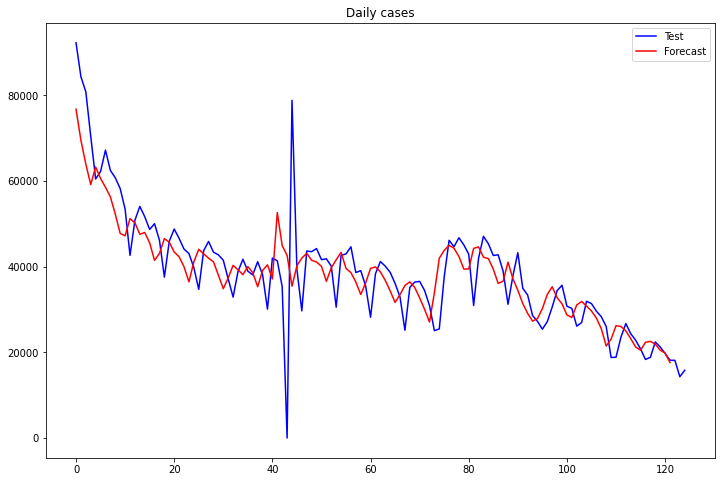

In [110]:
plot_fore_test(india_cases_test_scaled, yhat_uni_non_stacked_india_scaled, title='Daily cases')

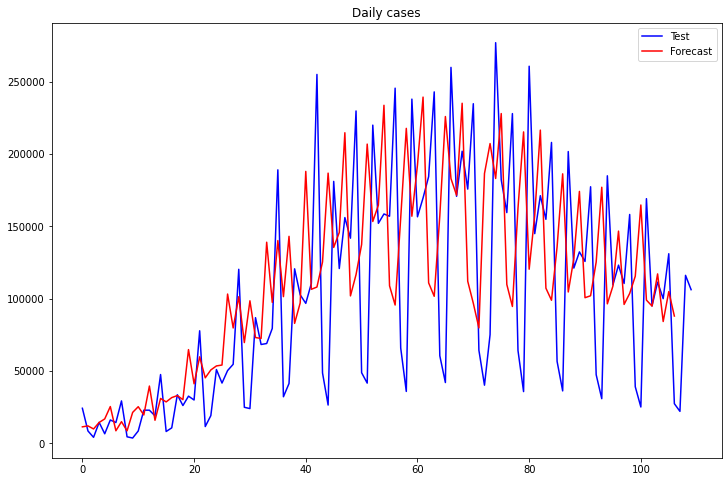

In [111]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_non_stacked_usa_scaled, title='Daily cases')

### Univariate Non Stacked -- Long-Term

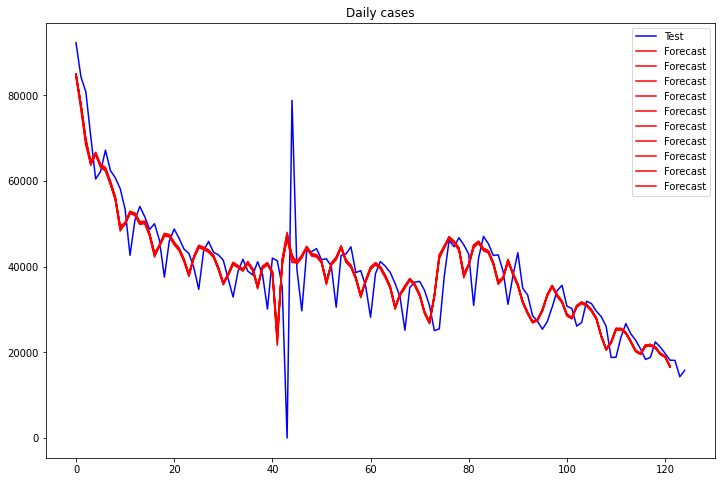

In [113]:
plot_fore_test(india_cases_test_scaled, yhat_uni_non_stacked_long_india_scaled, title='Daily cases')

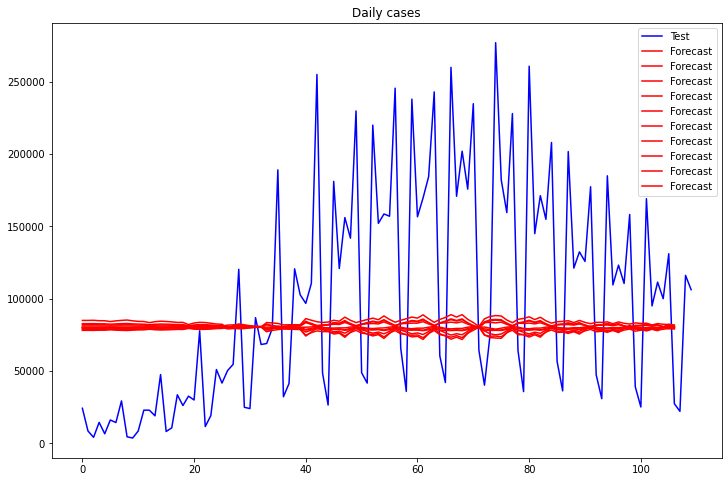

In [114]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_non_stacked_long_usa_scaled, title='Daily cases')

### Univariate Stacked -- Rolling

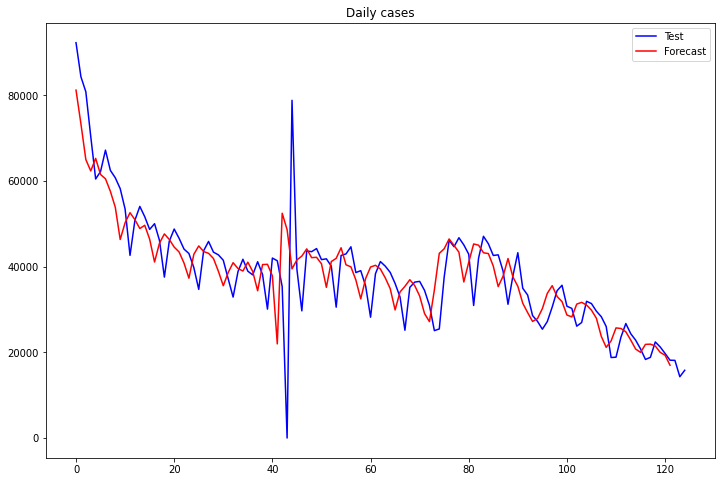

In [115]:
plot_fore_test(india_cases_test_scaled, yhat_uni_stacked_india_scaled, title='Daily cases')

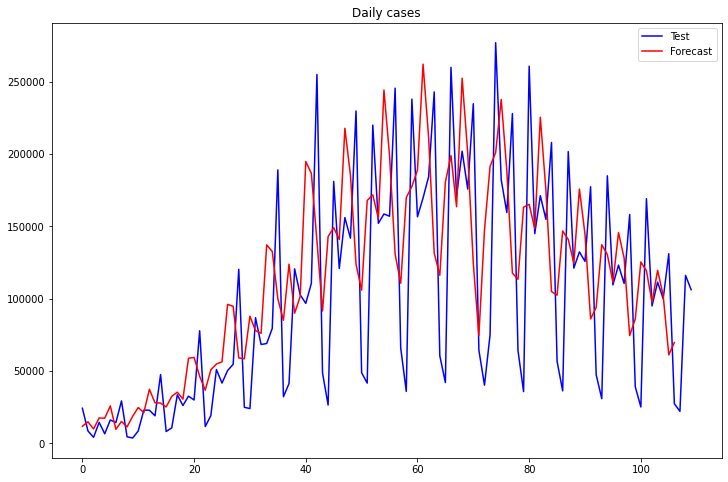

In [116]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_stacked_usa_scaled, title='Daily cases')

### Univariate Stacked -- Long-Term

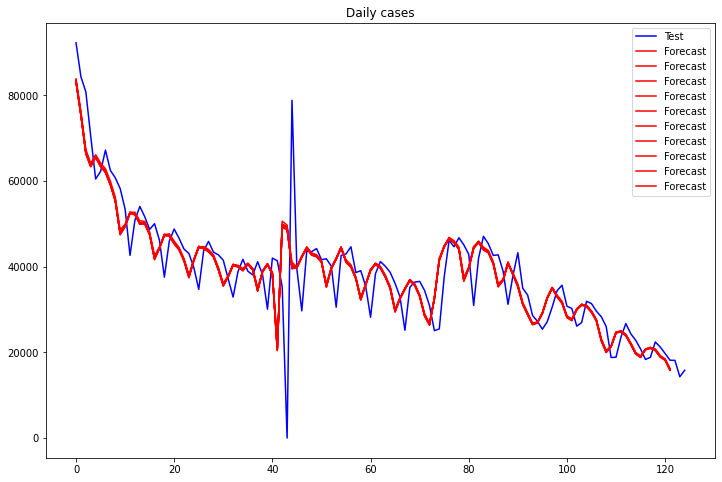

In [117]:
plot_fore_test(india_cases_test_scaled, yhat_uni_stacked_long_india_scaled, title='Daily cases')

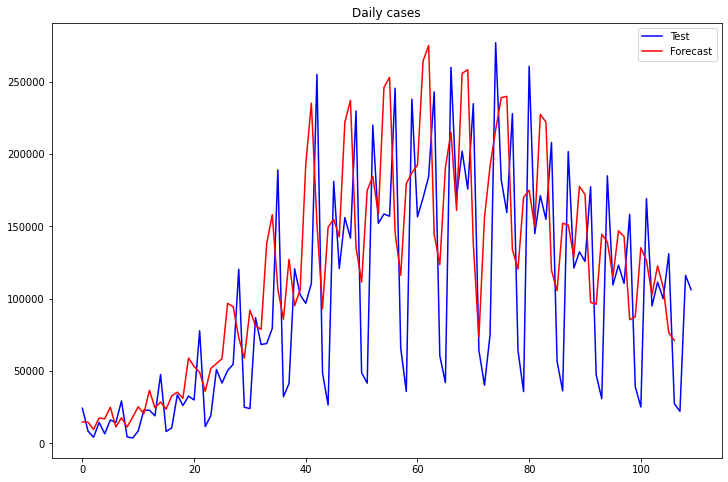

In [118]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_stacked_long_usa_scaled, title='Daily cases')